# Example of finding the gabor receptive field of a given neuron model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from fitgabor import GaborGenerator, trainer_fn
from fitgabor.utils import gabor_fn

---

## Creat a Model neuron

In [3]:
import torch
from torch import nn
from torch.nn import functional as F

class Neuron(nn.Module):
    def __init__(self, rf):
        super().__init__()
        self.rf = torch.tensor(rf.astype(np.float32))
        
    def forward(self, x):
        return F.elu((x * self.rf).sum()) + 1

In [4]:
theta = -np.pi/4
rf = gabor_fn(theta, sigma=4, Lambda=14, psi=np.pi/2, gamma=1, center=(15, 5), size=(64, 64))

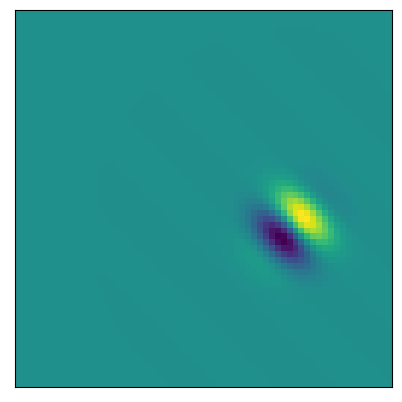

In [16]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.imshow(rf);
ax.set(xticks=[], yticks=[]);

In [6]:
neuron = Neuron(rf)

---

## Train a gabor generator that maximizes the model output

In [7]:
gabor_gen = GaborGenerator(image_size=(64, 64))

In [8]:
gabor_gen, evolved_rfs = trainer_fn(gabor_gen, neuron, epochs=20000, save_rf_every_n_epoch=100, sigma_reg_lambda=7.25)

Loss: 3.69: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [01:56<00:00, 172.33it/s]


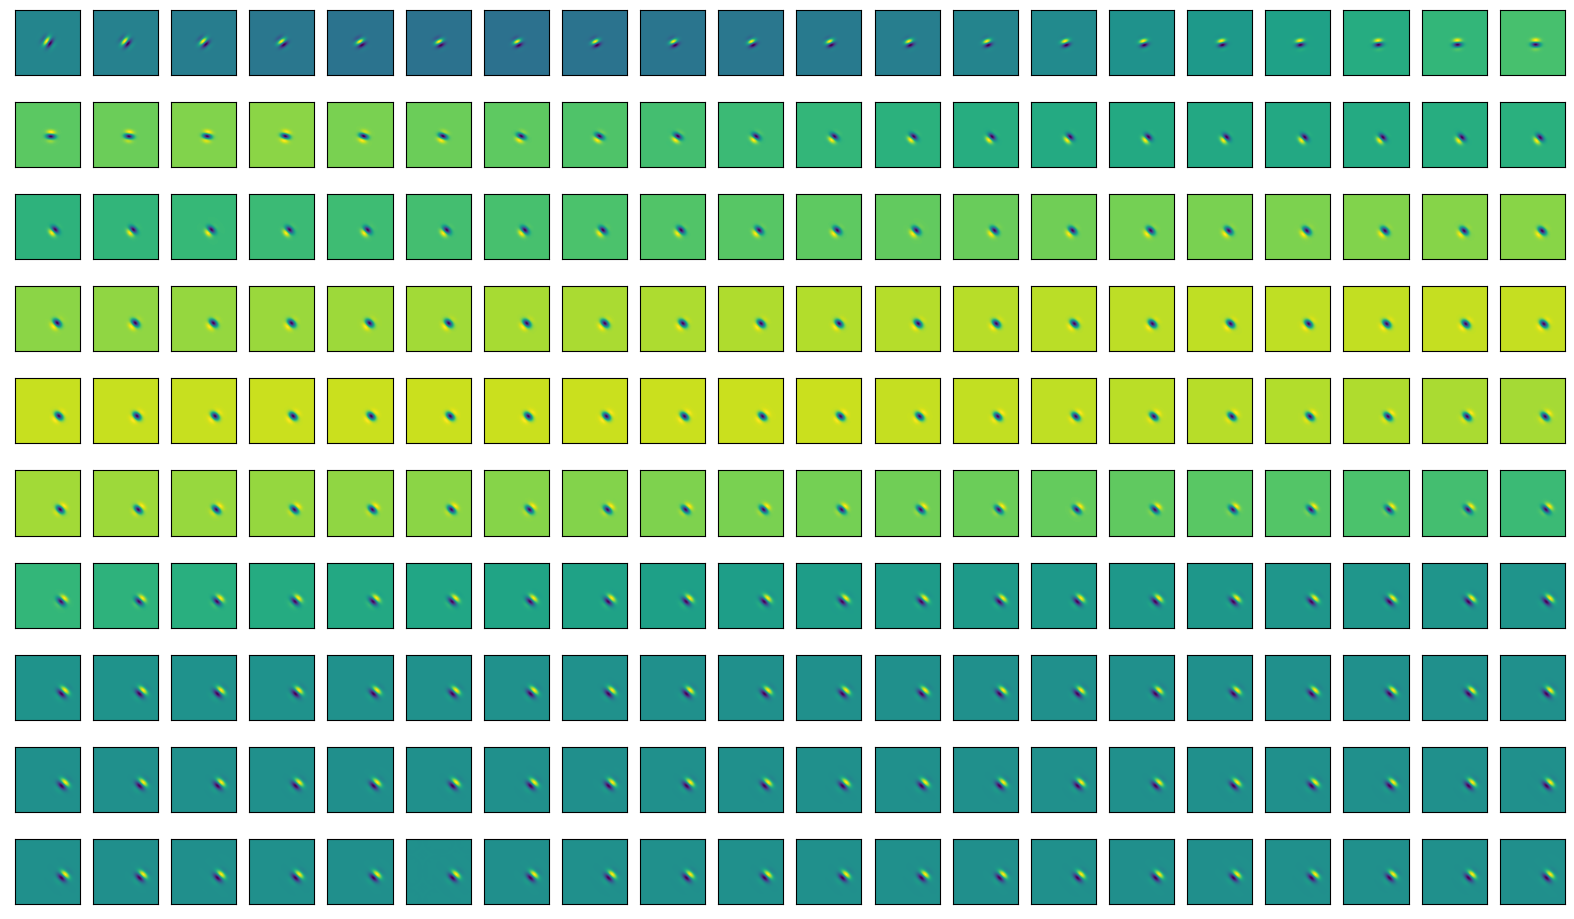

In [9]:
n_rows = 10
n_cols = (len(evolved_rfs) + n_rows - 1) // n_rows

fig, axes = plt.subplots(n_rows, n_cols, dpi=100, figsize=(20, 12))

for ind, ax in enumerate(axes.flat):
    if ind < len(evolved_rfs):
        ax.imshow(evolved_rfs[ind])
        ax.set(xticks=[], yticks=[])
    else:
        ax.axis('off')

In [10]:
learned_rf = gabor_gen().cpu().data.numpy()
true_rf = neuron.rf.cpu().data.numpy()

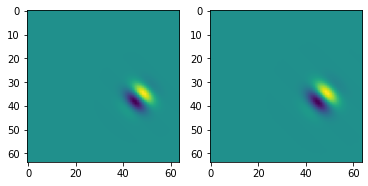

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.imshow(learned_rf);
ax2.imshow(true_rf);